In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [2]:
F_data = pd.read_csv("C:\Data Analysis - Files\Bike-datasheet\CBS_2021-2023_Full.csv")
F_data.head()

C:\Users\Karan\AppData\Local\Temp\ipykernel_1276\2008930750.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  F_data = pd.read_csv("C:\Data Analysis - Files\Bike-datasheet\CBS_2021-2023_Full.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [3]:
# Verify the result
print(F_data.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64


In [4]:
# Drop all rows with any NaN values
F_data = F_data.dropna()

In [5]:
# Verify the result
print(F_data.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


In [6]:
F_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9572692 entries, 0 to 10693995
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1022.5+ MB


In [7]:
## Added new column to check ride duration

F_data['started_at'] = pd.to_datetime(F_data['started_at'])
F_data['ended_at'] = pd.to_datetime(F_data['ended_at'])

F_data['Ride_duration'] = F_data['ended_at'] - F_data['started_at']

# If you want the duration in minutes (for example), you can use `.dt.total_seconds()` and convert
F_data['Ride_duration'] = F_data['Ride_duration'].dt.total_seconds() / 60

In [8]:
## Added new colum for day of week

F_data['Weekday'] = pd.to_datetime(F_data['ended_at']).dt.dayofweek
day = {0 : 'Monday',
       1 : 'Tuesday',
       2 : 'Wednesday',
       3 : 'Thursday',
       4 : 'Friday',
       5 : 'Saturday',       
       6 : 'Sunday'    
       }
F_data['Weekday'] = F_data['Weekday'].map(day)

F_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_duration,Weekday
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,25.333333,Friday
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,14.216667,Friday
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,5.583333,Friday
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,3.233333,Friday
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667,Friday


In [9]:
F_data['year'] = F_data['started_at'].dt.year

In [10]:
F_data['month']=F_data['started_at'].dt.month

In [11]:
# for graph combine two col.
F_data['year_member'] = F_data['year'].astype(str) + "_" + F_data['member_casual']

In [12]:
F_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_duration,Weekday,year,month,year_member
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,25.333333,Friday,2021,1,2021_member
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,14.216667,Friday,2021,1,2021_member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,5.583333,Friday,2021,1,2021_member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,3.233333,Friday,2021,1,2021_member
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667,Friday,2021,1,2021_casual


In [13]:
F_data['member_casual'].unique()

array(['member', 'casual'], dtype=object)

In [15]:
## Season column

def get_season (month):
    #month = date.month
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    elif month in [9,10,11]: 
        return 'fall'
    
F_data['Season'] = F_data['month'].apply(get_season)

## season + year

# Explanation:

# D_data['Season'].astype(str) and D_data['Year'].astype(str) ensure that both columns are converted to strings (if they're not already).
# The + operator concatenates the string values of 'Season' and 'Year' for each row.

F_data['Season_year'] = F_data['Season'].astype(str) + F_data['year'].astype(str)

In [16]:
F_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9572692 entries, 0 to 10693995
Data columns (total 20 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  Ride_duration       float64       
 14  Weekday             object        
 15  year                int32         
 16  month               int32         
 17  year_member         object        
 18  Season              object        
 19  Season_year         object        
dtypes: dat

In [17]:
F_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_duration,Weekday,year,month,year_member,Season,Season_year
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,25.333333,Friday,2021,1,2021_member,winter,winter2021
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,14.216667,Friday,2021,1,2021_member,winter,winter2021
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,5.583333,Friday,2021,1,2021_member,winter,winter2021
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,3.233333,Friday,2021,1,2021_member,winter,winter2021
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667,Friday,2021,1,2021_casual,winter,winter2021


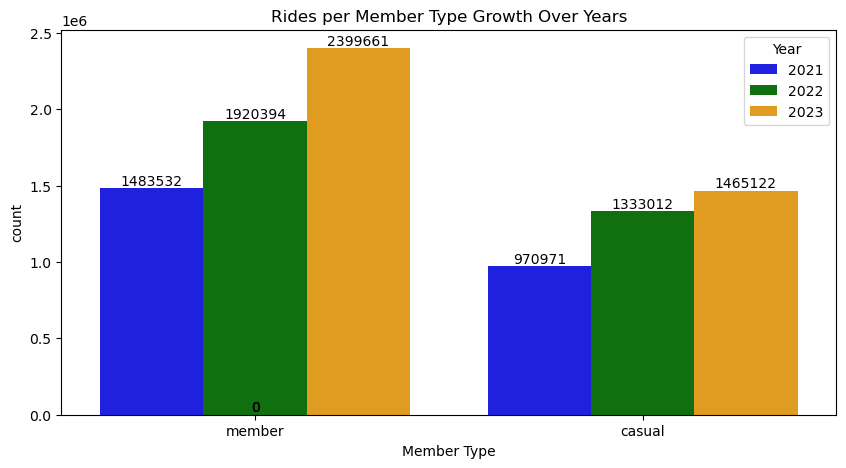

In [17]:

# Create the countplot
plt.figure(figsize=(10, 5))
plt.title('Rides per Member Type Growth Over Years')

# Set the color palette
Palette = {2021: 'blue', 2022: 'green', 2023: 'orange'}

# Create the countplot
ax = sns.countplot(data=F_data, x='member_casual', hue='year', palette=Palette)

# Annotate the count values (y-axis numbers) on top of the bars
for p in ax.patches:
    # Get the height of each bar (this is the count)
    height = p.get_height()

    # Get the x position of the bar (center of the bar)
    x_position = p.get_x() + p.get_width() / 2

    # Place the count value above the bar
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Member Type')
plt.legend(title='Year', loc='upper right')
plt.show()


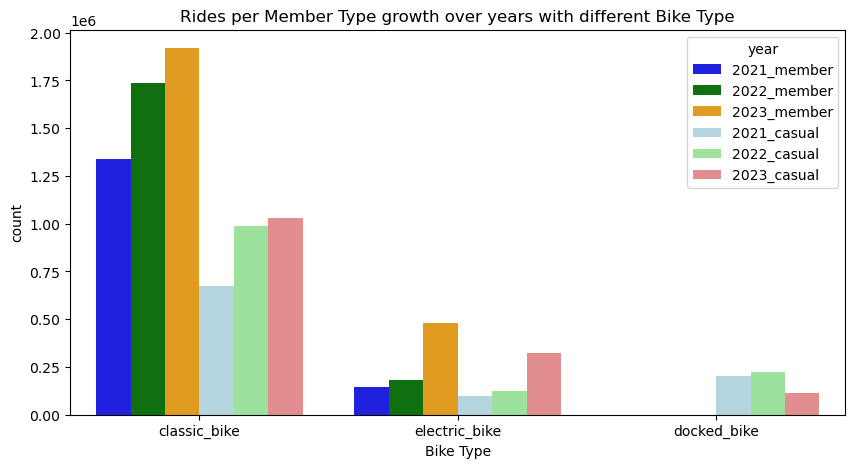

In [18]:
#Order = ['2021_member', '2021_casual','2022_member', '2022_casual','2023_member', '2023_casual']
Order = ['2021_member','2022_member','2023_member','2021_casual', '2022_casual', '2023_casual']
F_data['year_member'] = pd.Categorical(F_data['year_member'], categories=Order, ordered=True)
plt.figure(figsize=(10,5))
plt.title ('Rides per Member Type growth over years with different Bike Type')
#Palette = {2021: 'skyblue', 2022: 'green', 2023: 'orange'}
Palette = {
    '2021_member': 'blue', 
    '2021_casual': 'lightblue', 
    '2022_member': 'green', 
    '2022_casual': 'lightgreen',
    '2023_member': 'orange',
    '2023_casual': 'lightcoral'
}
#Order = ['2021_member', '2021_casual','2022_member', '2022_casual','2023_member', '2023_casual']
sns.countplot(data=F_data,x='rideable_type',hue='year_member', palette=Palette)
plt.xlabel ('Bike Type')
plt.legend(title='year', loc='upper right')


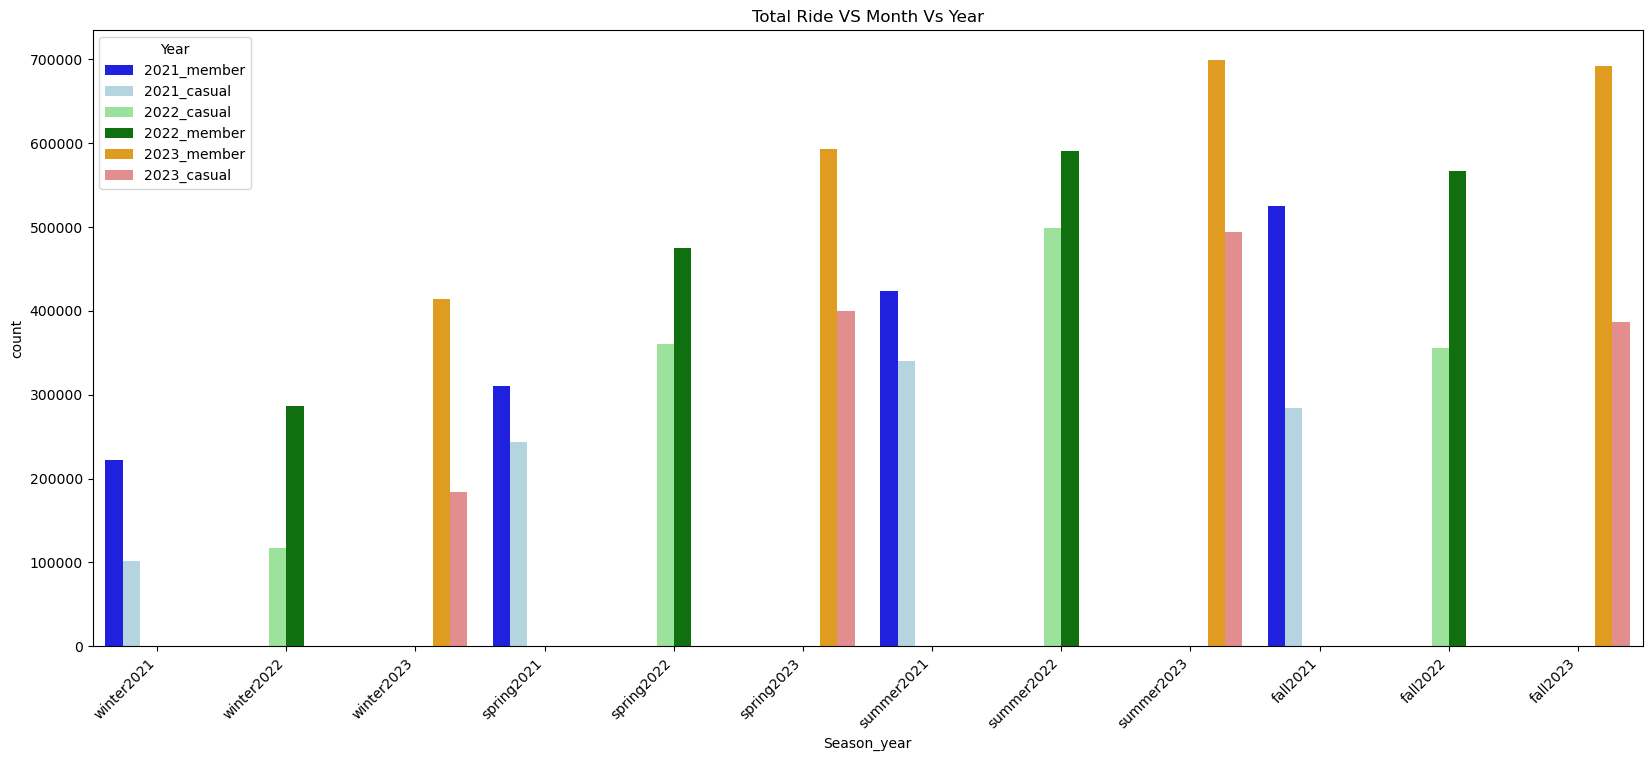

In [25]:
Season_order = ('winter2021','winter2022','winter2023','spring2021','spring2022','spring2023','summer2021','summer2022','summer2023','fall2021','fall2022','fall2023')
F_data['Season_year'] = pd.Categorical(F_data['Season_year'],categories=Season_order,ordered=True)
plt.figure(figsize=(20,8))
plt.title ('Total Ride VS Month Vs Year')
Palette = {
    '2021_member': 'blue', 
    '2021_casual': 'lightblue', 
    '2022_member': 'green', 
    '2022_casual': 'lightgreen',
    '2023_member': 'orange',
    '2023_casual': 'lightcoral'
}
bar_width = 0.8
sns.countplot(F_data,x='Season_year', hue='year_member' , palette= Palette, dodge=True, width=bar_width)

#Add legend
plt.legend(title='Year', loc='upper left')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [ ]:
Season_order = ('winter2021','winter2022','winter2023','spring2021','spring2022','spring2023','summer2021','summer2022','summer2023','fall2021','fall2022','fall2023')
F_data['Season_year'] = pd.Categorical(F_data['Season_year'],categories=Season_order,ordered=True)
plt.figure(figsize=(20,8))
plt.title ('Total Ride VS Month Vs Year')
Palette = {
    '2021_member': 'blue', 
    '2021_casual': 'lightblue', 
    '2022_member': 'green', 
    '2022_casual': 'lightgreen',
    '2023_member': 'orange',
    '2023_casual': 'lightcoral'
}
bar_width = 0.8
sns.countplot(F_data,x='Season_year', hue='year_member' , palette= Palette, dodge=True, width=bar_width)

#Add legend
plt.legend(title='Year', loc='upper left')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

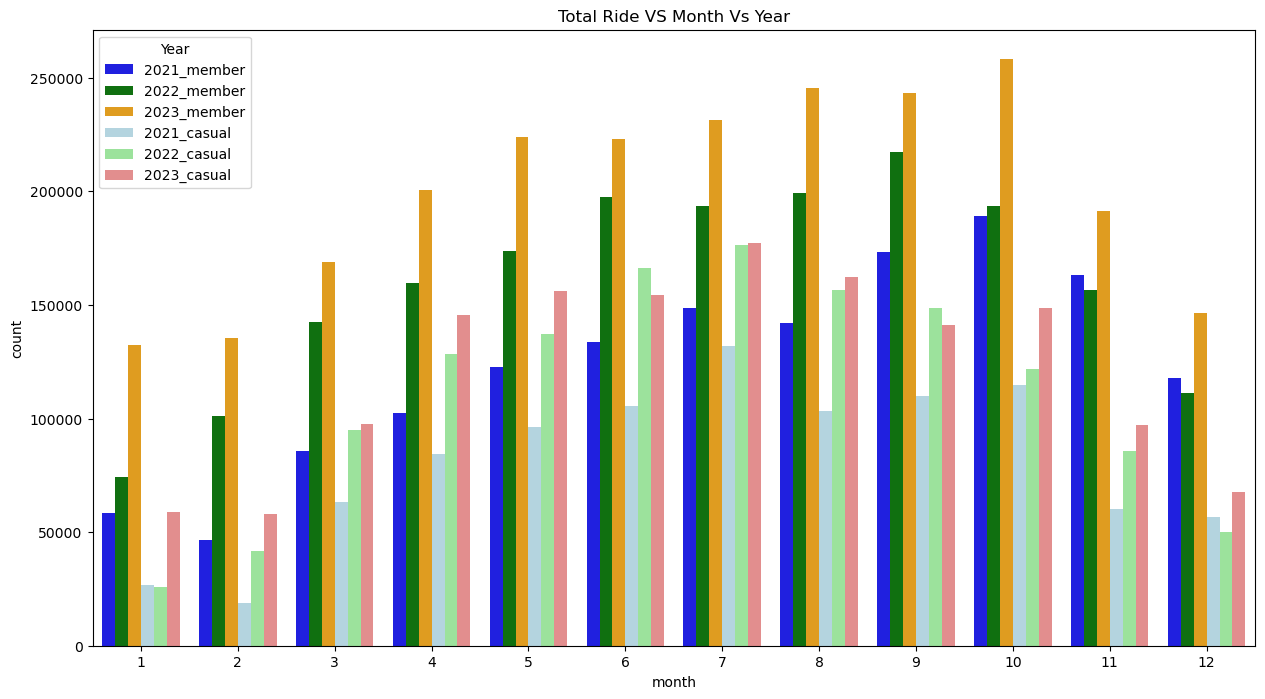

In [22]:
plt.figure(figsize=(15,8))
plt.title ('Total Ride VS Month Vs Year')
Palette = {
    '2021_member': 'blue', 
    '2021_casual': 'lightblue', 
    '2022_member': 'green', 
    '2022_casual': 'lightgreen',
    '2023_member': 'orange',
    '2023_casual': 'lightcoral'
}
sns.countplot(F_data,x='month', hue='year_member' , palette= Palette)

#Add legend
plt.legend(title='Year', loc='upper left')

# Show the plot
plt.show()

<Axes: xlabel='member_casual', ylabel='count'>

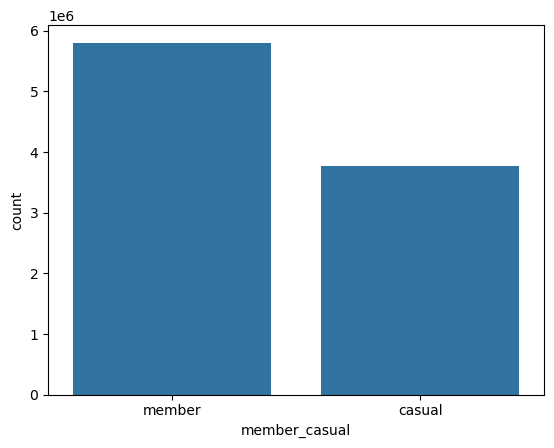

In [16]:
sns.countplot(F_data, x = 'member_casual')

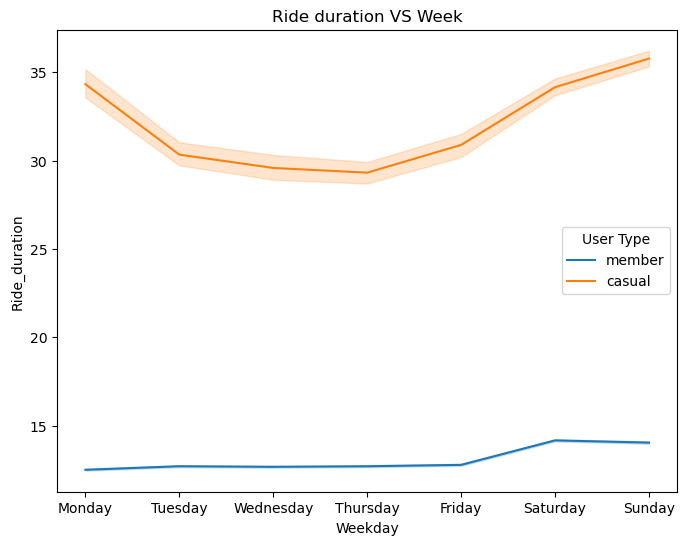

In [17]:

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] ## reorder x axis
# Convert 'Weekday' column to a categorical type with the specified order
F_data['Weekday'] = pd.Categorical(F_data['Weekday'], categories=weekday_order, ordered=True)
plt.figure(figsize=(8,6))
plt.title ('Ride duration VS Week')
sns.lineplot(data= F_data, x= 'Weekday' , y= 'Ride_duration', hue= 'member_casual')
plt.legend(title='User Type', loc='center right')
plt.show()

In [18]:
start_station_count = F_data['start_station_name'].value_counts()
start_station_count.head(25)

start_station_name
New Hampshire Ave & T St NW                              102179
Columbus Circle / Union Station                          100584
Lincoln Memorial                                          96667
15th & P St NW                                            95670
Jefferson Dr & 14th St SW                                 88078
1st & M St NE                                             85552
4th St & Madison Dr NW                                    83831
5th & K St NW                                             76586
Smithsonian-National Mall / Jefferson Dr & 12th St SW     76452
Henry Bacon Dr & Lincoln Memorial Circle NW               76236
14th & V St NW                                            75868
Eastern Market Metro / Pennsylvania Ave & 8th St SE       75397
Massachusetts Ave & Dupont Circle NW                      72609
8th & O St NW                                             68040
14th & R St NW                                            67332
11th & M St NW       

In [19]:
# Get unique station names
Stations = F_data['start_station_name'].unique()

# Filter F_data to get only rows where 'start_station_name' is in the list of unique station names
Check_Station = F_data[F_data['start_station_name'].isin(Stations)]

final_Stations = Check_Station.groupby('start_station_name').first()

In [34]:
center_lat = final_Stations['start_lat'].mean()
center_lon = final_Stations['start_lng'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=13, min_zoom=10,max_zoom=14)
for _, row in final_Stations.iterrows():
    folium.CircleMarker([row['start_lat'], row['start_lng']],radius=5,fill=True,fill_color='black',fill_opacity=1.0, popup=row['start_station_id']).add_to(m)
m

In [21]:
Top25_start_station_name = [
'New Hampshire Ave & T St NW',                              
'Columbus Circle / Union Station',                          
'Lincoln Memorial',                                          
'15th & P St NW',                                            
'Jefferson Dr & 14th St SW',                                 
'1st & M St NE',                                             
'4th St & Madison Dr NW',                                    
'5th & K St NW',                                             
'Smithsonian-National Mall / Jefferson Dr & 12th St SW',     
'Henry Bacon Dr & Lincoln Memorial Circle NW',
'14th & V St NW',                                            
'Eastern Market Metro / Pennsylvania Ave & 8th St SE',       
'Massachusetts Ave & Dupont Circle NW',                      
'8th & O St NW',                                            
'14th & R St NW',                                            
'11th & M St NW',                                            
'17th & Corcoran St NW',                                     
'15th & W St NW',                                            
'Thomas Circle',                                             
'6th & H St NE',                                             
'New Hampshire Ave & Ward Pl NW',                            
'4th & M St SW',                                             
'18th St & Wyoming Ave NW',                                  
'Adams Mill & Columbia Rd NW',                               
'Jefferson Memorial']

# Filter F_data to get only rows where start_station_name is in the top_10_start_stations list
filtered_data = F_data[F_data['start_station_name'].isin(Top25_start_station_name)] 
unique_filtered_data = filtered_data.groupby('start_station_name').first()
             

In [33]:
## Mapping

# Create a map centered at a central location (e.g., average latitude and longitude)
# You can also directly use a central location of your choice.
center_lat = unique_filtered_data['start_lat'].mean()
center_lon = unique_filtered_data['start_lng'].mean()

radius = 3750


m = folium.Map(location=[center_lat, center_lon], zoom_start=13, min_zoom=10,max_zoom=14)

folium.Circle(
    location=[center_lat, center_lon],  # The center of the circle
    radius=radius,                      # Radius in meters
    color="blue",                       # Circle border color
    fill=True,                           # Fill the circle
    fill_color="blue",                   # Fill color
    fill_opacity=0.2                    # Fill opacity
).add_to(m)

# Add markers for each station
for _, row in unique_filtered_data.iterrows():
    folium.CircleMarker([row['start_lat'], row['start_lng']],radius=5,color='red',fill=True,fill_color='red',fill_opacity=1.0, popup=row['start_station_id']).add_to(m)
    folium.CircleMarker([row['end_lat'], row['end_lng']],radius=5,color='blue', popup=row['end_station_id']).add_to(m)
    folium.PolyLine(locations=[[row['start_lat'], row['start_lng']], [row['end_lat'], row['end_lng']]],color='green', weight=2,opacity=1.0).add_to(m)
for _, row in final_Stations.iterrows():
    folium.CircleMarker([row['start_lat'], row['start_lng']],radius=8,color='black', popup=row['start_station_id']).add_to(m)
m
# Save or display the map
#m.save('stations_map.html')  # to save image
